# Confidence Intervals

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Learning Objectives

After studying this notebook, attending class, completing the home activities, and asking questions, you should be able to:
* Explain the correct interpretation of a 95% confidence interval
* Using a picture, explain the 68-95-99.7 rule to someone that just finished Calculus II
* Calculate any size confidence interval (95%, 99%, etc.) using z- or t-distribution

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

## Motivating Example: Catalyst Life

Imagine this summer you have an internship at a specialty chemical company. You are tasked with testing a new catalyst. You receive 25 test samples of catalyst. You record the number of hours of operation before each test sample experiences a substantial decrease in yield (i.e., fails). Below are the data.

In [2]:
lifetime = [3.2, 6.8, 4.2, 9.2, 11.2, 3.7, 2.9, 12.6, 6.4, 7.5, 8.6,
            4.5, 3.0, 9.6, 1.5, 4.5, 6.3, 7.2, 8.5, 4.2, 6.3, 3.2, 5.0, 4.9, 6.6]

With these data, you can use statistics to ask two fundamental questions:
1. What is the population mean lifetime? (We want an uncertainty range.)
2. Does this sample of 25 catalysts have the manufacturer's promised specifications?

Lifetime Average: 6.064 hours
Lifetime Standard Deviation: 2.7185113573424697 hours


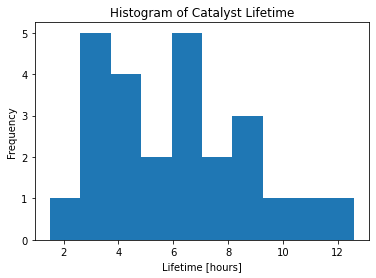

In [3]:
# Make a histogram
plt.hist(lifetime)
plt.title("Histogram of Catalyst Lifetime")
plt.xlabel("Lifetime [hours]")
plt.ylabel("Frequency")

# Compute the mean and standard deviation
xbar = np.mean(lifetime)
s = np.std(lifetime)

print("Lifetime Average: {} hours".format(xbar))
print("Lifetime Standard Deviation: {} hours".format(s))

## Confidence Interval

**Further Reading**: ยง5.1 in Navidi (2015)

Let's focus on the first question from above. We want to construct lower and upper bounds using the 25 observations above such that if we repeated our calculation *many many* times (i.e., the manufacture kept sending up batches of 25 samples to test), our process would capture the *true mean* **X%** (i.e., 95%, 99%, etc.) of the time.

**Key Insights**:
* We are assuming the lifetime of a catalyst can be modeled as a random process (probability distribution) with an unknown mean.
* **Frequentist** statistics cares about the **long-term error rate** of estimation methods.
* We are **not making probabilistic statements** about the catalyst lifetime. For example, we are **not saying there is an X%** chance the true mean falls within this interval. Further reading: https://www.graphpad.com/guides/prism/7/statistics/stat_more_about_confidence_interval.htm
* To make probablistic statements, we would need to use **Bayesian** statistics (i.e., credibility interval).

### 68-95-99.7 Rule

![rule](../../media/68-95-99.7.png)

Image credit: https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2

### Confidence Interval Formula

$$\bar{x} \pm z^* \frac{s}{\sqrt{n}}$$

Elements:
* $\bar{x}$ : sample mean
* $z^*$ : z-score
* $s$ : sample standard deviation
* $n$ : sample size

### Catalyst Life Example

Calculate a 95% confidence interval for the catalyst example.

In [4]:
xbar - 1.96*s/math.sqrt(len(lifetime))

4.998343547921752

In [5]:
xbar + 1.96*s/math.sqrt(len(lifetime))

7.129656452078248

95% Confidence interval for mean catalyst lifetime: 5.00-7.13 hours

Alternately, we can use Python or the z-table to determine $z^*$.

See the code below for various confidence interval calculations.

In [7]:
## calculate 95% confidence interval
n = len(lifetime)
zstar95 = stats.norm.interval(0.95)
low = xbar + zstar95[0]*s/math.sqrt(n)
high = xbar + zstar95[1]*s/math.sqrt(n)
print("95% confidence interval: [",round(low,2),",", round(high,2),"] hours")

## calculate 90% confidence interval
n = len(lifetime)
zstar90 = stats.norm.interval(0.9)
low = xbar + zstar90[0]*s/math.sqrt(n)
high = xbar + zstar90[1]*s/math.sqrt(n)
print("90% confidence interval: [",round(low,2),",", round(high,2),"] hours")


## calculate 99% confidence interval
n = len(lifetime)
zstar99 = stats.norm.interval(0.99)
low = xbar + zstar99[0]*s/math.sqrt(n)
high = xbar + zstar99[1]*s/math.sqrt(n)
print("99% confidence interval: [",round(low,2),",", round(high,2),"] hours")

95% confidence interval: [ 5.0 , 7.13 ] hours
90% confidence interval: [ 5.17 , 6.96 ] hours
99% confidence interval: [ 4.66 , 7.46 ] hours
